# **WEEK 7 - HOMEWORK 2**
-----
# **Database Programming**
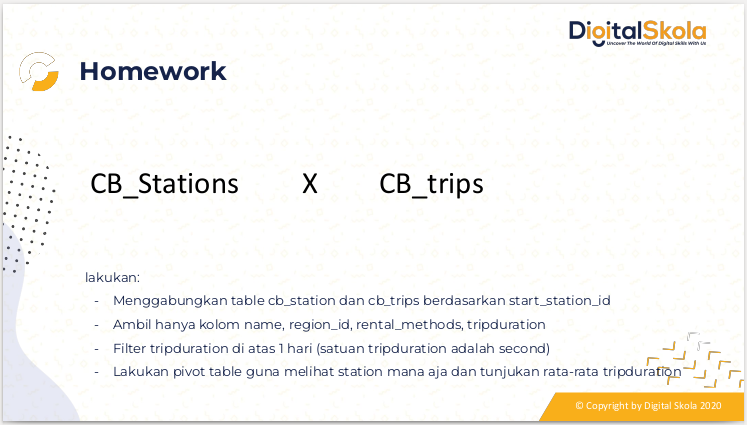

In [ ]:
!pip install psycopg2

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import psycopg2

In [ ]:
# Connect to PostgreSQL
conn = psycopg2.connect(
    host = 'digitalskoladb.c04me33o8tni.ap-southeast-1.rds.amazonaws.com',
    database = 'sandbox',
    user = 'ds11_3',
    password = 'ds11_3'
)

In [ ]:
# Temporary Memory
cur = conn.cursor()

In [ ]:
# Execute query & read result in pandas dataframe
sql = """
      select 
	      s.name,
	      s.region_id,
	      s.rental_methods,
	      t.tripduration	
      from batch_11.cb_stations as s
      join batch_11.cb_trips as t
      on s.station_id = t.end_station_id
      where t.tripduration > 86400
      """
data = pd.read_sql_query(sql, conn)
data

,name,region_id,rental_methods,tripduration
0,Broadway & W 58 St,71,"CREDITCARD,KEY",167992
1,E 3 St & 1 Ave,71,"CREDITCARD,KEY",100848
2,9 Ave & W 45 St,71,"CREDITCARD,KEY",350865
3,W 44 St & 5 Ave,71,"CREDITCARD,KEY",104368
4,12 Ave & W 40 St,71,"CREDITCARD,KEY",97014
5,Bedford Ave & S 9 St,71,"CREDITCARD,KEY",87513
6,S 5 Pl & S 5 St,71,"CREDITCARD,KEY",109207
7,W 17 St & 8 Ave,71,"CREDITCARD,KEY",88057
8,Leonard St & Church St,71,"CREDITCARD,KEY",90965
9,Bedford Ave & S 9 St,71,"CREDITCARD,KEY",110849


In [ ]:
# Pivot Table
table = pd.pivot_table(data, values='tripduration', index=['rental_methods', 'name'], 
                       columns='region_id',aggfunc=np.mean)
table

region_id                                           71
rental_methods name                                   
CREDITCARD,KEY 12 Ave & W 40 St                97014.0
               8 Ave & W 33 St                217948.0
               9 Ave & W 45 St                350865.0
               Atlantic Ave & Furman St       120336.0
               Bedford Ave & S 9 St            99181.0
               Broadway & W 56 St              88411.0
               Broadway & W 58 St             167992.0
               Columbia St & Rivington St     145506.0
               E 3 St & 1 Ave                 100848.0
               FDR Drive & E 35 St           6250750.0
               Forsyth St & Canal St           93452.0
               Franklin Ave & Myrtle Ave      409415.0
               Fulton St & Clermont Ave       159004.0
               Hancock St & Bedford Ave       102653.5
               Kent Ave & S 11 St             118257.0
               Lafayette St & E 8 St          124456.0
               Lawrence St & Willoughby St    113089.0
               Leonard St & Church St          90965.0
               Old Fulton St                  730955.0
               S 5 Pl & S 5 St                109207.0
               W 17 St & 8 Ave                 88057.0
               W 42 St & 8 Ave                332510.0
               W 44 St & 5 Ave                104368.0
               Willoughby Ave & Walworth St   601177.0